In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import astropy as ap
import pandas as pd
from astropy.cosmology import Planck18 as cosmo
from astropy.constants import iau2012 as const
import astropy.units as u
from astropy.coordinates import Angle
from ipynb.fs.full.Dataframe_GOALS import *
from ipynb.fs.full.Xi import *
from scipy.optimize import curve_fit

,Name,RA,Dec,Redshift,D_L [Mpc],log(LIR),LIR_unc x 1e11,AGNbol,AGNbol_unc,SFR [M$_{\odot}$],un-corr SFR [M$_{\odot}$],Supernova rate [yr$^{-1}$],un-corr Supernova rate [yr$^{-1}$],Flux(TeV) [GeV cm$^{-2}$ s$^{-1}$],Flux(TeV) no AGN [GeV cm$^{-2}$ s$^{-1}$],SigmaIR (x 10$^{10}$ ),R_70 (kpc)
0,NGC0023,00h09m53.32s,+25d55m26.2s,0.01523,65.2,11.11,0.051,0.09,0.04,22.30,24.50,0.268086,0.294600,6.889599e-12,7.570988e-12,2.048,1.000564
1,NGC0034a,00h11m06.59s,-12d06m25.5s,0.01962,84.1,11.50,0.079,0.04,0.02,57.74,60.15,0.694231,0.723157,1.072326e-11,1.117007e-11,79.180,0.252117
2,MCG-02-01-051a,00h18m50.87s,-10d22m36.6s,0.02722,117.5,11.67,0.087,0.07,0.05,82.41,88.61,0.994754,1.069628,7.871454e-12,8.463929e-12,9.730,0.874689
3,ESO350-IG038,00h36m52.20s,-33d33m20.8s,0.02060,89.0,11.28,0.094,0.23,0.09,27.53,35.76,0.335524,0.435745,4.627628e-12,6.009907e-12,7.641,0.629992
4,NGC0232a,00h42m45.80s,-23d33m42.0s,0.02217,95.2,11.48,0.301,0.09,0.03,51.55,56.65,0.628455,0.690610,7.575569e-12,8.324801e-12,10.697,0.670315
5,NGC0232b,00h42m52.78s,-23d32m28.9s,0.02217,95.2,10.64,0.051,0.47,0.06,4.33,8.16,0.052906,0.099824,6.377489e-13,1.203300e-12,NaN,NaN
6,MCG+12-02-001,00h54m03.48s,+73d05m03.8s,0.01570,69.8,11.49,0.058,0.06,0.04,54.51,57.99,0.664295,0.706696,1.489583e-11,1.584663e-11,10.264,0.692232
7,NGC0317B,00h57m40.41s,+43d47m32.9s,0.01811,77.8,11.23,0.039,0.05,0.02,30.47,32.08,0.368941,0.388359,6.659048e-12,7.009524e-12,24.822,0.329983
8,IC1623AB,01h07m47.49s,-17d30m27.1s,0.02007,85.5,11.73,0.090,0.12,0.04,89.43,101.63,1.080726,1.228098,1.615095e-11,1.835336e-11,7.663,1.056114
9,MCG-03-04-014,01h10m08.98s,-16d51m09.7s,0.03349,144.0,11.62,0.105,0.07,0.04,73.03,78.53,0.886576,0.953307,4.670955e-12,5.022533e-12,3.390,1.398976


<Figure size 720x648 with 0 Axes>

In [2]:
from ipynb.fs.full.Diffuse_IceCube_nb import *


In [3]:
HerschelChu_201 = np.loadtxt("Herschel_Chu.txt")
names_Chu = np.loadtxt('Names.txt',dtype ='str')
DAsystem = np.array([i[1] for i in HerschelChu_201])
LIRsystem = np.array([i[3] for i in HerschelChu_201])
df_system = pd.DataFrame({ 'Optical name' : [i[1] for i in names_Chu],
                    'IRAS name' : [i[0] for i in names_Chu],
                     'log(LIR)': [i for i in LIRsystem],
                   'D_L [Mpc]': [i for i in DAsystem]})

# Estimating the IR generation rate of the GOALS sample

In [4]:
def complete_dataframe(DL_compl,txt,syst):
    if txt == 'LIRGs':
        if syst == 'individual':
            complete_df = df[(df['D_L [Mpc]'] < DL_compl) & (df['log(LIR)'] < 12) ] #only galaxies within completeness radius
        if syst == 'system':
            complete_df = df_system[(df_system['D_L [Mpc]'] < DL_compl) & (df_system['log(LIR)'] < 12) ] #only galaxies within completeness radius
    
    if txt == '(U)LIRG': 
        if syst == 'individual':
            complete_df = df[(df['D_L [Mpc]'] < DL_compl)] #only galaxies within completeness radius 
        else:
            complete_df = df_system[(df_system['D_L [Mpc]'] < DL_compl)] #only galaxies within completeness radius
            
    return complete_df

complete_dataframe returns a dataframe with all the GOALS galaxies up to a completeness distance DL_complete where one has to specifiy if individual galaxies or systems are targeted and in addition whether LIRGs OR U/LIRGs are targeted.

In [5]:
def QIR(DL_compl,txt,syst, AGNcorr):
    complete_df = complete_dataframe(DL_compl,txt,syst)
    if AGNcorr == 'no':
        logLIR_complete_array = complete_df['log(LIR)'].to_numpy()
        LIR_complete_array = np.array([pow(10,i) for i in logLIR_complete_array])
        totalIR = (sum(LIR_complete_array*u.solLum)).to(u.erg/u.yr) #total IR luminosity in solLum for complete set
        

    if AGNcorr == 'yes':
        logLIR_complete_array = complete_df['log(LIR)'].to_numpy()
        AGNfrac_complete_array = complete_df['AGNbol'].to_numpy()
        LIR_complete_array = np.array([(1-i)*pow(10,j) for i,j in zip(AGNfrac_complete_array,logLIR_complete_array)])
        totalIR = (sum(LIR_complete_array*u.solLum)).to(u.erg/u.yr) #total IR luminosity in solLum for complete set
         
    Dmax = DL_compl*u.Mpc 
    Volume = (4/3)*pow(Dmax,3)*np.pi #Completeness distance required to compute the volume in which IR is generated
    #print(totalIR/Volume)
    return [(totalIR/Volume).value,totalIR.value]

QIR return an IR generation rate, using comple_dataframe 

In [6]:
def Generation_rate_diff(DL_compl,txt,E,Emin,Emax,alpha,eta,txt1,txt2,txt3,txt4):
    #Emin = 1 #note that this can be variable!!
    #Emax = pow(10,11)
    if alpha == 2:
        Rp = np.log(Emax/Emin)
    else:
        Rp = ((pow(Emin,-alpha+2)-pow(Emax,-alpha+2))/(alpha-2))*pow(E,alpha-2)
    #print(QIR(DL_compl,txt1,txt3,txt4)[0])
    return (QIR(DL_compl,txt1,txt3,txt4)[0]*eta)/Rp #erg Mpc-3 yr-1 

In [7]:
Dmax_range= np.arange(20,420,0.5)
Vmax = [(4/3)*np.pi*pow(i,3) for i in np.arange(20,420,0.5)]
QIR_LIRG_individual = [QIR(i,'LIRGs','individual','no')[0] for i in Dmax_range]
QIR_LIRG_individual_AGNcorr = [QIR(i,'LIRGs','individual','yes')[0] for i in Dmax_range]
QIR_U_LIRG_individual = [QIR(i,'(U)LIRG','individual','no')[0] for i in Dmax_range]
QIR_LIRG_system = [QIR(i,'LIRGs','system','no')[0] for i in Dmax_range]
QIR_U_LIRG_system = [QIR(i,'(U)LIRG','system','no')[0] for i in Dmax_range]

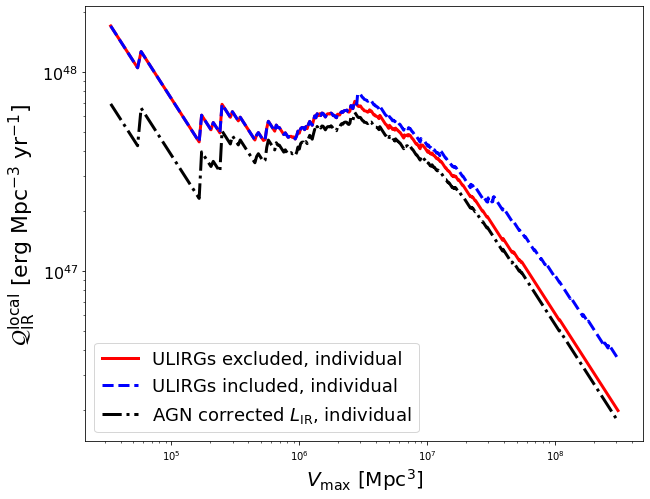

In [8]:
fig3 = plt.figure(figsize=(10,8))
plt.plot(Vmax,QIR_LIRG_individual, c = 'red', label = 'ULIRGs excluded, individual',linewidth =3)
#plt.plot(Vmax,QIR_LIRG_system, c = 'green', label = 'ULIRGs excluded, system',linewidth =3)

plt.plot(Vmax,QIR_U_LIRG_individual, c= 'blue', linestyle = '--', label = 'ULIRGs included, individual ',linewidth = 3)#plt.xticks(fontsize= 16)
#plt.plot(Vmax,QIR_U_LIRG_system, c= 'm', linestyle = 'dotted', label = 'ULIRGs included, system',linewidth = 3)#plt.xticks(fontsize= 16)

plt.plot(Vmax,QIR_LIRG_individual_AGNcorr, c = 'k',linestyle = 'dashdot', label = 'AGN corrected $L_{\mathrm{IR}}$, individual',linewidth = 3)

plt.yticks(fontsize= 16)
plt.ylabel('$\\mathcal{Q}^{ \mathrm{local}}_{\\mathrm{IR}}$ [erg Mpc$^{-3}$ yr$^{-1}$]', fontsize = 22)
plt.xlabel('$V_{\\mathrm{max}}$ [Mpc$^3$]',fontsize = 20)
plt.legend(fontsize = 18)
plt.yscale('log')
plt.xscale('log')

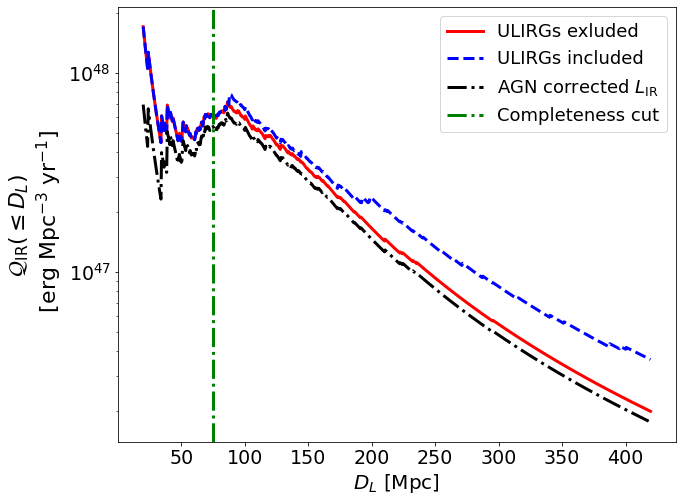

In [9]:
fig3 = plt.figure(figsize=(10,8))
plt.plot(Dmax_range,QIR_LIRG_individual, c = 'red', label = 'ULIRGs exluded',linewidth =3)
plt.plot(Dmax_range,QIR_U_LIRG_individual, c= 'blue', linestyle = '--', label = 'ULIRGs included',linewidth = 3)
plt.plot(Dmax_range,QIR_LIRG_individual_AGNcorr, c = 'k',linestyle = 'dashdot', label = 'AGN corrected $L_{\mathrm{IR}}$',linewidth = 3)
plt.axvline(x = 75, linestyle = 'dashdot',c = 'green', linewidth = 3, label = 'Completeness cut')
plt.xticks(fontsize= 19)
plt.yticks(fontsize= 19)
plt.ylabel('$\\mathcal{Q}_{\\mathrm{IR}}({\leq D_L})$ \n [erg Mpc$^{-3}$ yr$^{-1}$]', fontsize = 22)
plt.xlabel('$D_L$ [Mpc]',fontsize = 20)
plt.legend(fontsize = 18)
plt.yscale('log')
plt.savefig("/Users/yarno/Documents/PhD/Pictures/Extrapolation_plots/QIR.png",bbox_inches="tight")



# Redshift evolution parameter $\xi(z)$

In [10]:
z_range = np.arange(0,4,0.01)
xi_U_2 = [xi(2,i,'ULIRG') for i in z_range]
xi_SFR_2 = [xi(2,i,'starforming') for i in z_range]
xi_flat_2 = [xi(2,i,'flat') for i in z_range]
xi_U_3 = [xi(3,i,'ULIRG') for i in z_range]
xi_SFR_3 = [xi(3,i,'starforming') for i in z_range]
xi_flat_3 = [xi(3,i,'flat') for i in z_range]

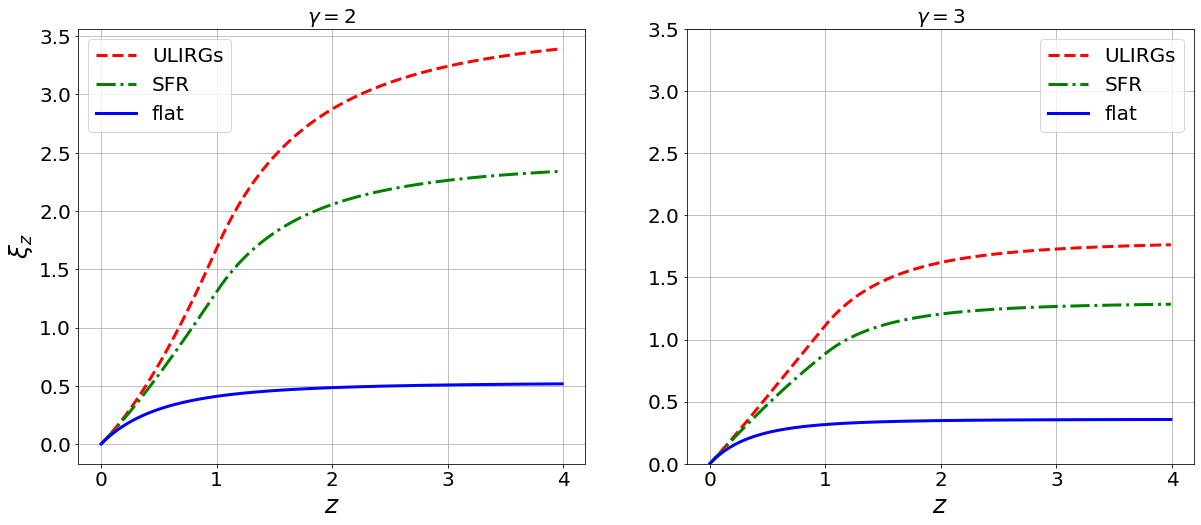

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(20,8))
ax[0].plot(z_range,xi_U_2, color='red', label = 'ULIRGs', linestyle = '--', linewidth = 3)
ax[0].plot(z_range,xi_SFR_2, color='green', label = 'SFR',linestyle ='-.', linewidth = 3)
ax[0].plot(z_range,xi_flat_2, color='blue', label = 'flat',linewidth = 3 )
ax[1].plot(z_range,xi_U_3, color='red', label = 'ULIRGs', linestyle = '--',linewidth = 3)
ax[1].plot(z_range,xi_SFR_3, color='green', label = 'SFR', linestyle = '-.',linewidth = 3)
ax[1].plot(z_range,xi_flat_3, color='blue', label = 'flat',linewidth = 3)
ax[1].set_ylim(0,3.5)
ax[0].tick_params(axis='both', which='major', labelsize=20)
ax[0].tick_params(axis='both', which='major', labelsize=20)
ax[1].tick_params(axis='both', which='major', labelsize=20)
ax[1].tick_params(axis='both', which='major', labelsize=20)

ax[0].set_ylabel('$\\xi_z$', fontsize = 25)
ax[0].set_xlabel('$z$', fontsize = 25)
ax[1].set_xlabel('$z$', fontsize = 25)

ax[0].legend(fontsize = 20)
ax[1].legend(fontsize = 20)

ax[0].set_title('$\\gamma = 2$', fontsize = 20)
ax[1].set_title('$\\gamma = 3$', fontsize = 20)


ax[0].grid()
ax[1].grid()

plt.savefig("/Users/yarno/Documents/PhD/Pictures/Extrapolation_plots/Hz_evolution.png",bbox_inches="tight")


In [12]:
gamma_range = np.arange(2,3,0.01)
xi_U_z4 = [xi(i,4,'ULIRG') for i in gamma_range]
xi_SFR_z4 = [xi(i,4,'starforming') for i in gamma_range]
xi_flat_z4 = [xi(i,4,'flat') for i in gamma_range]
xi_U_z1 = [xi(i,1,'ULIRG') for i in gamma_range]
xi_SFR_z1 = [xi(i,1,'starforming') for i in gamma_range]
xi_flat_z1 = [xi(i,1,'flat') for i in gamma_range]

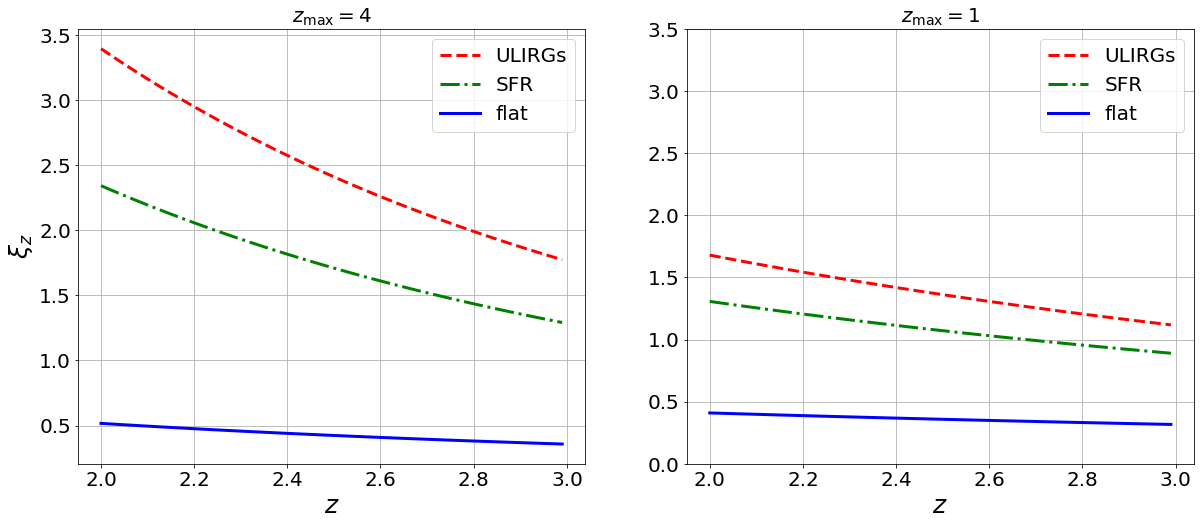

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(20,8))
ax[0].plot(gamma_range,xi_U_z4, color='red', label = 'ULIRGs', linestyle = '--', linewidth = 3)
ax[0].plot(gamma_range,xi_SFR_z4, color='green', label = 'SFR',linestyle ='-.', linewidth = 3)
ax[0].plot(gamma_range,xi_flat_z4, color='blue', label = 'flat',linewidth = 3 )
ax[1].plot(gamma_range,xi_U_z1, color='red', label = 'ULIRGs', linestyle = '--',linewidth = 3)
ax[1].plot(gamma_range,xi_SFR_z1, color='green', label = 'SFR', linestyle = '-.',linewidth = 3)
ax[1].plot(gamma_range,xi_flat_z1, color='blue', label = 'flat',linewidth = 3)
ax[1].set_ylim(0,3.5)
ax[0].tick_params(axis='both', which='major', labelsize=20)
ax[0].tick_params(axis='both', which='major', labelsize=20)
ax[1].tick_params(axis='both', which='major', labelsize=20)
ax[1].tick_params(axis='both', which='major', labelsize=20)

ax[0].set_ylabel('$\\xi_z$', fontsize = 25)
ax[0].set_xlabel('$z$', fontsize = 25)
ax[1].set_xlabel('$z$', fontsize = 25)

ax[0].legend(fontsize = 20)
ax[1].legend(fontsize = 20)

ax[0].set_title('$z_{\mathrm{max}} = 4$', fontsize = 20)
ax[1].set_title('$z_{\mathrm{max}} = 1$', fontsize = 20)


ax[0].grid()
ax[1].grid()

plt.savefig("/Users/yarno/Documents/PhD/Pictures/Extrapolation_plots/xivsgamma.png",bbox_inches="tight")


\begin{equation}
    E^{2}_{\nu_{}}\Phi_{\nu_i} \approx \frac{1}{3}\frac{c}{4\pi} t_{H} \xi_{z}\frac{3K}{4(1+K)} \min[1,f_{\mathrm{pp}/p\gamma}] \left(E_{\mathrm{CR}}\mathcal{Q}_{E_\mathrm{CR}}\right)~.
\end{equation}

Here I should also include the value of $\xi$ as function of the spectral index. 

# Relating the integrated CR generation rate to the differential rate via $R$ 

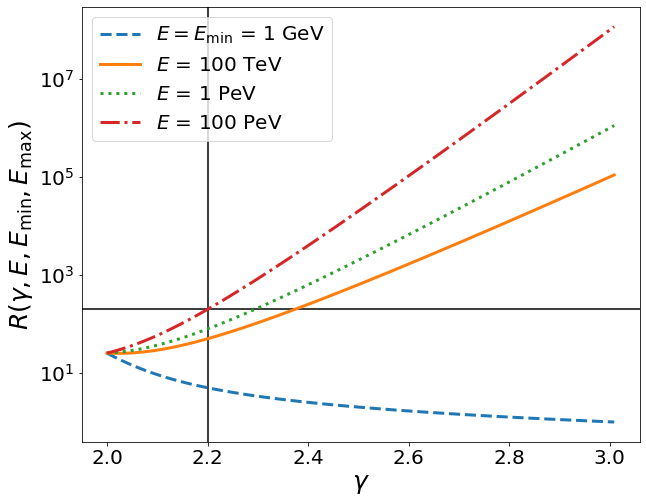

In [14]:
def Rp(E,Emin,Emax,s):
    if s==2:
        return np.log(Emax/Emin)
    else: 
        return ((pow(Emin,-s+2)-pow(Emax,-s+2))/(s-2))*pow(E,s-2)
    
fig3 = plt.figure(figsize=(10,8))
s_range = np.arange(2,3.01,0.001)
Rp = np.vectorize(Rp)

plt.axhline(y=200,c ='k')
plt.axvline(x=2.2,c ='k')

plt.plot(s_range, Rp(1,1,1e11,s_range),'--', label = '$E = E_{\min}$ = 1 GeV',linewidth = 3)
plt.plot(s_range, Rp(1e5,1,1e11,s_range), label= '$E$ = 100 TeV',linewidth = 3)
plt.plot(s_range, Rp(1e6,1,1e11,s_range),linestyle = 'dotted', label= '$E$ = 1 PeV',linewidth = 3)
plt.plot(s_range, Rp(1e8,1,1e11,s_range),linestyle = 'dashdot', label= '$E$ = 100 PeV',linewidth = 3)
plt.legend(fontsize = 20)
plt.yscale('log')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('$\\gamma$',fontsize = 25)
plt.ylabel('$R(\\gamma, E, E_{\\min}, E_{\\max})$',fontsize = 25)
plt.savefig("/Users/yarno/Documents/PhD/Pictures/Extrapolation_plots/R.png",bbox_inches="tight")

PhD thesis of M. Vereecken: R=200 for $\alpha = 2.2$ and $E = 100$ PeV. This is confirmed by the above plot.

# Estimating the diffuse neutrino flux

\begin{equation}
    E^{2}_{\nu_{}}\Phi_{\nu_i} \approx \frac{1}{3}\frac{c}{4\pi} t_{H} \xi_{z}\frac{3K}{4(1+K)} \min[1,f_{\mathrm{pp}/p\gamma}] \left(E_{\mathrm{CR}}\mathcal{Q}_{E_\mathrm{CR}}\right)~.
\end{equation}

In [15]:
def nuflux(E,Emin,Emax, alpha,DL_compl,xiz,eta,fpp,txt,txt2,txt3,txt4):
    tH = (pow(cosmo.H(0),-1)).to((u.Mpc*u.s)/u.Mpc) #inverse of Hubble parameter in seconds
    
    ctH = (const.c).to(u.cm/u.s)*tH # unit: cm
    
    Generation_rate_nunits = (Generation_rate_diff(DL_compl,txt,E,Emin,Emax,alpha,eta,txt,txt2,txt3,txt4)*(u.erg/(pow(u.Mpc,3)*u.yr))).to(u.GeV/(pow(u.cm,3)*u.s)) #unit: GeV/(cm3 s)
    Kpi = lambda txt2: 0.5 if(txt2 == 'pp') else 3/8
    
    return ((1/3)*((ctH*xiz)/(4*np.pi))*Kpi(txt2)*fpp*Generation_rate_nunits).value# unit: GeV/(cm2 s sr)


In [16]:
Emin = 1
Emax = 1e11
eta_tot_2 = ((1e51*0.1*5.43e-46*(u.erg/u.yr)).to(u.erg/u.s)).value# calib factor based on BH cutoff mass = 40 solar masses
eta_tot = ((1e51*0.1*5.97e-46*(u.erg/u.yr)).to(u.erg/u.s)).value #BH cutoff mass standard SB99 
#this might be confusing but the idea is that using the e-46 results in a CR generation rate per year while the 
#LIR input is in erg s-1, so to find the converion factor ntot we need to convert this value into erg s-1 to get the proper fraction
F1 = [nuflux(0,Emin,Emax,2,i,xi(2,4,'ULIRG'),eta_tot,1,'(U)LIRG','pp','individual','no') for i in Dmax_range ]
F2 = [nuflux(0,Emin, Emax, 2,i,xi(2,4,'ULIRG'),eta_tot,1,'LIRGs','pp','individual','no') for i in Dmax_range ]
F3 = [nuflux(0,Emin, Emax, 2,i,xi(2,4,'ULIRG'),eta_tot,1,'LIRGs','pp','individual','yes') for i in Dmax_range ]

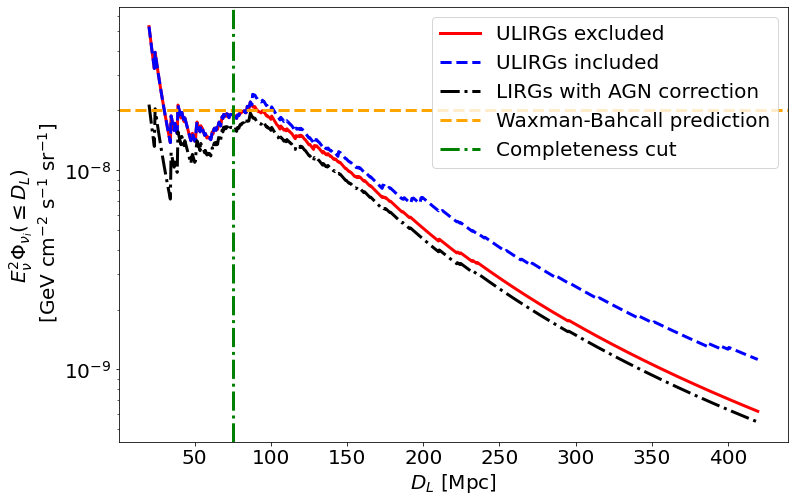

In [17]:
fig3 = plt.figure(figsize=(12,8))

plt.plot(Dmax_range,F2, color = 'red',linewidth = 3, label = 'ULIRGs excluded')
plt.plot(Dmax_range,F1, color = 'blue',linestyle='dashed',linewidth = 3,label = 'ULIRGs included')
plt.plot(Dmax_range,F3, color = 'black',linestyle='dashdot',linewidth = 3,label = 'LIRGs with AGN correction')

plt.axhline(y= 2e-8, linestyle = '--', color = 'orange',linewidth = 3, label = 'Waxman-Bahcall prediction')
plt.axvline(x = 75, linestyle = 'dashdot',c = 'green', label = 'Completeness cut', linewidth = 3)
plt.yscale('log')
plt.xlabel('$D_L$ [Mpc]',fontsize = 20)
plt.ylabel('$E^{2}_{\\nu_{}}\Phi_{\\nu_i}$($\leq D_L$) \n [GeV cm$^{-2}$ s$^{-1}$ sr$^{-1}$] ',fontsize = 20)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 20)
plt.savefig("/Users/yarno/Documents/PhD/Pictures/Extrapolation_plots/LIRGnudiff.png",bbox_inches="tight")

In the paper we present the diffuse neutrino flux from the LIRG population for specific values, computed with the code below

In [18]:
def Normalizing_factor(xiz, R,fpp,eta_tot,Qir):
    tH = (pow(cosmo.H(0),-1)).to((u.Mpc*u.s)/u.Mpc) #inverse of Hubble parameter in seconds
    ctH = (const.c).to(u.cm/u.s)*tH # unit: cm
    qq= fpp*(Qir*(u.erg/(pow(u.Mpc,3)*u.yr))).to(u.GeV/(pow(u.cm,3)*u.s))
    print((Qir*(u.erg/(pow(u.Mpc,3)*u.yr))).to(u.erg/(pow(u.Mpc,3)*u.yr)))
    print(eta_tot*qq)
    return xiz*R*(1/6)*(ctH/(4*np.pi*u.sr))*eta_tot*qq

In [19]:
print(Normalizing_factor(3.4,1/25,1,eta_tot, QIR(75,'LIRGs','individual','no')[0]))

6.2213173960085935e+47 erg / (Mpc3 yr)
7.922946549880088e-34 GeV / (cm3 s)
1.953906486921294e-08 GeV / (cm2 s sr)


In [20]:
np.log10(6.22)

0.7937903846908186

As such we find that for a completeness distance of $D_L \approx 75$ Mpc the IR generation rate is $\mathcal{Q}_{\rm IR} \approx 10^{47.79}$ erg Mpc$^{-3}$ s$^{-1}$. 

# Comparing to the IceCube diffuse measurements

First we perform a fit to the IceCube data using the expression: 

\begin{equation}
    E^{2}_{\nu_{}}\Phi_{\nu_i} \approx \frac{1}{3}\frac{c}{4\pi} t_{H} \xi_{z}\frac{3K}{4(1+K)} \min[1,f_{\mathrm{pp}/p\gamma}] \left(E_{\mathrm{CR}}\mathcal{Q}_{E_\mathrm{CR}}\right)~.
\end{equation}

In this fit the parameter $\eta_{tot}$ and the spectral index $\gamma$ are the fit parameters. For this we use $\xi(\gamma = 2.37,z=4)$ as fixed parameter in the equation. As the fit of $\gamma$ is independent of the value of $\xi$ we decided to take $\xi(\gamma = 2.37,z=4)$ for consistency. Moreover, for $E_{min}$ and $E_{max}$ we used the 20 times the lowerst and highest value for the energy range of the observed muon neutrinos. 

In [21]:
def nuflux_fit(E,eta,alpha,xi,fpp):
    def Generation_rate_diff_fit(E,alpha,eta):
        # computed following E_nu = E_cr / 20
        Emin = 300000 
        Emax = 1e8
        if alpha == 2:
            Rp = np.log(Emax/Emin)
        else:
            Rp = ((pow(Emin,-alpha+2)-pow(Emax,-alpha+2))/(alpha-2))*pow(E,alpha-2)
        return (6.2213173960085935e+47*eta)/Rp #erg Mpc-3 yr-1, this is the value found for D_L,compl = 75 Mpc 
    
    complete_df = df[(df['D_L [Mpc]'] < 75) & (df['log(LIR)'] < 12) ]
    tH = (pow(cosmo.H(0),-1)).to((u.Mpc*u.s)/u.Mpc) #inverse of Hubble parameter in seconds
    
    ctH = ((const.c).to(u.cm/u.s)*tH).value # unit: cm
    
    Generation_rate_nunits = (Generation_rate_diff_fit(E,eta,alpha)*(u.erg/(pow(u.Mpc,3)*u.yr))).to(u.GeV/(pow(u.cm,3)*u.s)) #unit: GeV/(cm3 s)
    
    Kpi = 0.5
    return (1/3)*((ctH*xi)/(4*np.pi))*Kpi*fpp*(Generation_rate_nunits).value# unit: GeV/(cm2 s sr)


In [22]:
fpp_vals= np.arange(0.1,1,0.01)
eta_lowz = []
gamma_lowz = []

eta_highz = []
gamma_highz = []


for i in fpp_vals:
    #
    popt_lowz, pcov_lowz = curve_fit(lambda E, eta,alpha: nuflux_fit(E, eta, alpha,i,1.44), 
                            energy_range_numu,flux_numu*energy_range_numu**2)
    
    popt_highz,pcov_highz = curve_fit(lambda E, eta,alpha: nuflux_fit(E, eta, alpha,i,2.66), 
                            energy_range_numu,flux_numu*energy_range_numu**2)
    #print(popt[1],np.sqrt(np.diag(pcov))[1])
    eta_lowz += [popt_lowz[1]]  
    gamma_lowz += [popt_lowz[0]]  
    eta_highz += [popt_highz[1]]
    gamma_highz += [popt_highz[0]]

#print(gamma_fixfpp)  
#print(gamma_fixiz)

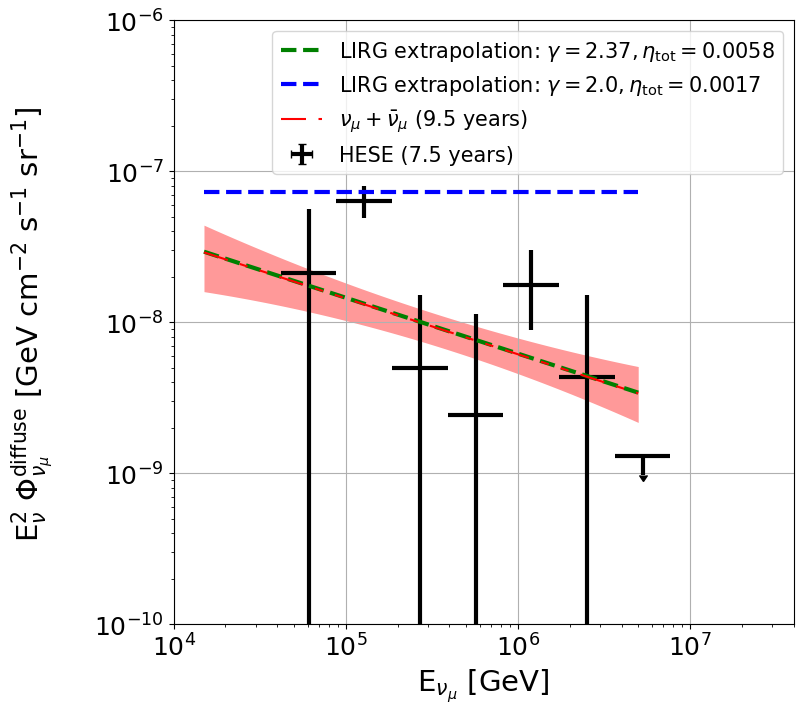

In [30]:
# Plot the HESE data up to index i
i = len(energy)
fig=plt.figure(figsize=(8,8), dpi= 100, facecolor='w', edgecolor='k')
Energy_plot = np.logspace(np.log10(1.5e4),np.log10(5e6),12)
diffuse_LIRG_flux = [nuflux(i,300000, 1e8, 2.37,75,2.66,1,1.14496857e-04,'LIRGs','pp','individual','no') for i in Energy_plot]

plt.plot(Energy_plot, diffuse_LIRG_flux, 'g--', linewidth = 3,label = 'LIRG extrapolation: $\\gamma = 2.37, \\eta_{\mathrm{tot}}= 0.0058$')
diffuse_LIRG_flux = [nuflux(i,300000, 1e8, 2,75,3.4,1,eta_tot,'LIRGs','pp','individual','yes') for i in Energy_plot]
plt.plot(Energy_plot, diffuse_LIRG_flux, 'b--', linewidth = 3,label = 'LIRG extrapolation: $\\gamma = 2.0, \\eta_{\mathrm{tot}}= 0.0017$')

#plt.plot(Energy_plot, diffuse_LIRG_flux_G, linewidth = 3,label = 'LIRG extrapolation $\\gamma = 2.2, \\eta_{\mathrm{tot}}= 0.003$')

HESE = plt.errorbar(energy[:i],
                   flux[:i],
                   xerr=[energy_lower_err[:i],energy_upper_err[:i]],
                   yerr=[flux_lower_err[:i],flux_upper_err[:i]],
                   uplims=upper_limits[:i],
                   marker="o",
                   markersize=0,
                   color="k",
                   linestyle="none",
                   linewidth=3,
                   capsize=0, label = 'HESE (7.5 years)')


en = np.arange(1e4,5e6,100)

# Plot the diffuse nu_mu best fit
plt.xscale('log')
plt.yscale('log')
numu_best = plt.plot(energy_range_numu,
                    flux_numu*energy_range_numu**2,
                    color="r",
                    linestyle=(0,(12,6,4,6,4,6)), label= '$\\nu_\\mu + \\bar{\\nu}_{\\mu}$ (9.5 years)') # dashdotdotted

# Plot the error band of the diffuse nu_mu best fit



numu_err = plt.fill_between(energy_numu,
                           flux_lower,
                           flux_upper,
                           color="r",
                           lw=0,
                           alpha=0.4)


plt.ylim(1e-10,1e-6)
plt.xlim(1e4,4e7)
plt.xlabel ("E$_{\\nu_\\mu}$ [GeV]", fontsize = 21)
plt.ylabel('E$_{\\nu}^2$ $\\Phi ^{\\mathrm{diffuse}}_{\\nu_\\mu}$ [GeV cm$^{-2}$ s$^{-1}$ sr$^{-1}$] \n', fontsize = 21)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.xscale('log')
plt.yscale('log')
plt.legend(fontsize = 15)
plt.grid()
plt.savefig("/Users/yarno/Documents/PhD/Pictures/Extrapolation_plots/fit.png",bbox_inches="tight")


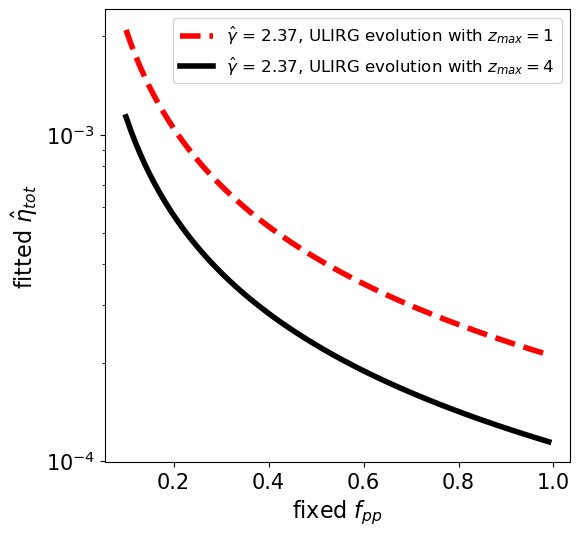

In [31]:
fig=plt.figure(figsize=(6,6), dpi= 100, facecolor='w', edgecolor='k')

plt.plot(fpp_vals, eta_lowz,linestyle = '--', c = 'r',label ="$\\hat{\\gamma}$ = 2.37, ULIRG evolution with $z_{max} = 1$",lw = 4)
plt.plot(fpp_vals, eta_highz, c = 'k', label= "$\\hat{\\gamma}$ = 2.37, ULIRG evolution with $z_{max} = 4$", lw = 4)
plt.xlabel('fixed $f_{pp}$',fontsize = 16)
plt.ylabel('fitted $\\hat{\\eta}_{tot}$', fontsize = 16)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(fontsize = 12)
plt.yscale('log')
plt.savefig("/Users/yarno/Documents/PhD/Pictures/Extrapolation_plots/etatotvsfpp.png",bbox_inches="tight")


This plot shows the fitted $\hat{\eta}_{tot}$ for a range of fixed $f_{pp}$ values. The black solid line shows the fit for a redshift parameter consistent with a ULIRG evolution up to redshift 1 and the red dashed line up to $z=4$. In the fit, the spectral index is also a free parameter and is found to be $\hat{\gamma} = 2.37$. I made this plot to investigate the range of the $\eta_{tot}$ parameter and more specifically the effect of the extrapolation only being justified up to a certain redshift.

As follow-up I should also check the effect of changing Emin and Emax.

# Can we extrapolate all the way to $z=4$ ?

It was brought to my attention that $L_{\mathrm{IR}} > 10^{11}~L_{\odot}$ locally targets merger-driven starbursts but at high redshift such galaxies seem to evolve individually rather than in a merger. If the merger aspect is crucial for efficient neutrino production, then the extrapolation might only be relevant up to a certain redshift. Here we we investigate how the neutrino flux prediction is affected as function of redshift, which affects $\xi(z)$. 

In [25]:

F_xi_U = [nuflux(0,Emin, Emax, 2,75,xi(2,i,'ULIRG'),eta_tot,1,'(U)LIRG','pp','individual','no')for i in z_range]

F_xi_SFR = [nuflux(0,Emin, Emax, 2,75,xi(2,i,'starforming'),eta_tot,1,'(U)LIRG','pp','individual','no') for i in z_range]


(array([1.e-12, 1.e-11, 1.e-10, 1.e-09, 1.e-08, 1.e-07, 1.e-06]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

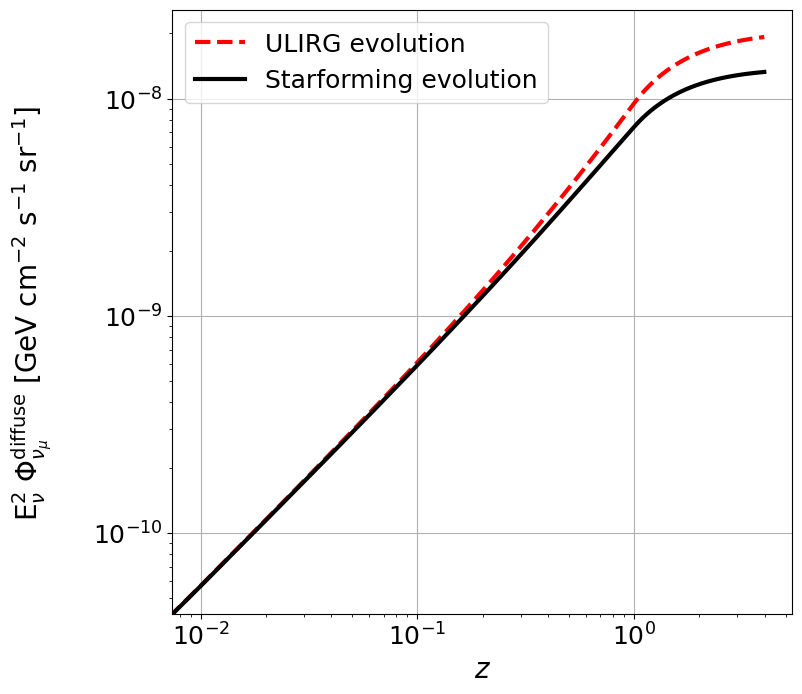

In [26]:
fig=plt.figure(figsize=(8,8), dpi= 100, facecolor='w', edgecolor='k')

plt.plot(z_range, F_xi_U, label = 'ULIRG evolution', linestyle = '--', c = 'red',linewidth = 3)
plt.plot(z_range, F_xi_SFR, label = 'Starforming evolution', c = 'k', linewidth = 3)
#plt.axhline(y= 2e-8, linestyle = '--', color = 'orange',linewidth = 3, label = 'Waxman-Bahcall prediction')
plt.ylabel('E$_{\\nu}^2$ $\\Phi ^{\\mathrm{diffuse}}_{\\nu_\\mu}$ [GeV cm$^{-2}$ s$^{-1}$ sr$^{-1}$] \n', fontsize = 20)
plt.xlabel('$z$', fontsize = 20)
plt.yscale('log')
plt.xscale('log')
plt.grid()
plt.legend(fontsize = 18)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)

This plot shows the dependence of the diffuse neutrino flux prediction as function of the extrapolation redshift. I made this plot after getting the comment that high-redshift LIRGs are different from local LIRGs and therefore one should be carefull with an extrapolation over cosmic history. 

# Cross check

To cross check the above results we check wether we find the same results if we use a scaling of the uncorrected supernova rate obtained from the dataframe vs applying a conversion factor to the IR luminosity density. This seems like a trivial idea but it checks if a mistake was made in the code.  

In [27]:
def nuflux_check(DLcompl,df,E, Emin, Emax, s, zmax):
    tH = (pow(cosmo.H(0),-1)).to((u.Mpc*u.s)/u.Mpc) #inverse of Hubble parameter in seconds
    ctH = (const.c).to(u.cm/u.s)*tH # unit: cm
    df_test = df[(df['D_L [Mpc]'] < DLcompl) & (df['log(LIR)'] < 12) ]
    ESN = 1e51
    etaSN = 0.1
    V = (4/3)*np.pi*pow(DLcompl,3)
    LCR_test = np.sum(df_test['un-corr Supernova rate [yr$^{-1}$] '])*ESN*etaSN
    QCR_test = ((LCR_test/V)*(u.erg*pow(u.yr,-1)*pow(u.Mpc,-3))).to(u.GeV*pow(u.s,-1)*pow(u.cm,-3))
    return xi(s,zmax,'ULIRG')*pow(Rp(E, Emin, Emax, s),-1)*(1/6)*(ctH/(4*np.pi*u.sr))*QCR_test

    

In [28]:
kwargs_Rp = {'E':200,"Emin":1, "Emax":1e11,"s":2, "zmax":4}
nuflux_check(75,df, **kwargs_Rp)

<Quantity 1.92647013e-08 GeV / (cm2 s sr)>

This flux is the same as was found previously via 

In [29]:
result = (((pow(10,11.11)*u.solLum).to(u.erg*u.s**-1)).value*5.97e-46*0.1
          *1e51*u.erg)/((pow(10,11.11)*u.solLum).to(u.erg*u.yr**-1).value)
result

<Quantity 0.00189178 erg>

(!) The conclusion: the parameter $\eta_{\rm tot}$, defined as $\mathcal{L}_{\rm CR}/\mathcal{L}_{\rm IR}$ is of the order of 0.1% for [$\mathcal{L}_{\rm IR}$] = [$\mathcal{L}_{\rm CR}$]  = erg/yr

This plot shows the fitted $\hat{\eta}_{tot}$ for a range of fixed $f_{pp}$ values. The black solid line shows the fit for a redshift parameter consistent with a ULIRG evolution up to redshift 1 and the red dashed line up to $z=4$. In the fit, the spectral index is also a free parameter and is found to be $\hat{\gamma} = 2.37$. I made this plot to investigate the range of the $\eta_{tot}$ parameter and more specifically the effect of the extrapolation only being justified up to a certain redshift.